**Light GBM Regresyon**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("./dataset01.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])
y = df["Salary"]
X_ = df.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [3]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [86 lines of output]
      INFO:root:running bdist_wheel
      /Users/mohammadqasemmuzafarzada/anaconda3/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      INFO:root:running build
      INFO:root:running build_py
      INFO:root:creating build
      INFO:root:creating build/lib
      INFO:root:creating build/lib/lightgbm
      INFO:root:copying lightgbm/callback.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/compat.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/plotting.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/__init__.py -> build/lib/lightgbm
      

In [4]:
conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/mohammadqasemmuzafarzada/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.5.7   |       hf0a4a13_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    lightgbm-3.3.5             |  py310h313beb8_0         979 KB
    openssl-1.1.1u             |       h53f4e23_0         1.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:

In [5]:
from lightgbm import LGBMRegressor

**Model & Tahmin İşlemleri**

In [10]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [11]:
lgb_model

LGBMRegressor()

In [12]:
y_pred = lgb_model.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

In [14]:
?lgb_model

Type:           LGBMRegressor
String form:    LGBMRegressor()
File:           ~/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py
Docstring:      LightGBM regressor.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (default=

**Model Tuning**

In [15]:
lgbm_params = {"learning_rate": [0.1,0.01,0.5,1],
            "max_depth": [1,2,3,4,5,6,7,8,9,10],
            "n_estimators": [20,40,100,200,500,1000]}

In [16]:
lgbm_cv_model = GridSearchCV(lgb_model, lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   0.0s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1000; total time=   0.0s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1000; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=40; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=40; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, 

In [17]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [19]:
lgbm_tuned = LGBMRegressor( learning_rate = 0.1, max_depth = 6, n_estimators = 20).fit(X_train, y_train)

In [20]:
y_pred = lgbm_tuned.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

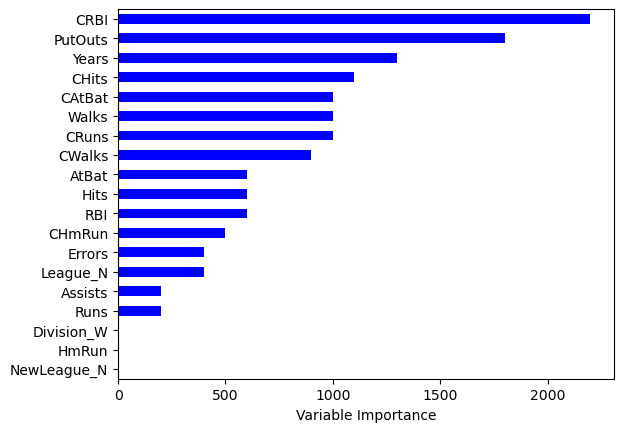

[CV] END ..learning_rate=0.5, max_depth=6, n_estimators=1000; total time=   0.1s
[CV] END ..learning_rate=0.5, max_depth=6, n_estimators=1000; total time=   0.1s
[CV] END ..learning_rate=0.5, max_depth=6, n_estimators=1000; total time=   0.1s
[CV] END ..learning_rate=0.5, max_depth=6, n_estimators=1000; total time=   0.1s
[CV] END ..learning_rate=0.5, max_depth=6, n_estimators=1000; total time=   0.1s
[CV] END ....learning_rate=0.5, max_depth=7, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.5, max_depth=7, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.5, max_depth=7, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.5, max_depth=7, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.5, max_depth=7, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.5, max_depth=7, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.5, max_depth=7, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0

In [26]:
Importance = pd.DataFrame({'Importance': lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = 'Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'b')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None